<a href="https://colab.research.google.com/github/aniray2908/ML-foundations-rebuild/blob/main/statistical_learning/demos/10_svm_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines Demonstration

Goal:
- Compare Logistic Regression vs Linear SVM vs RBF SVM
- Visualize margin behavior
- Understand effect of C and gamma
- Observe boundary flexibility

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

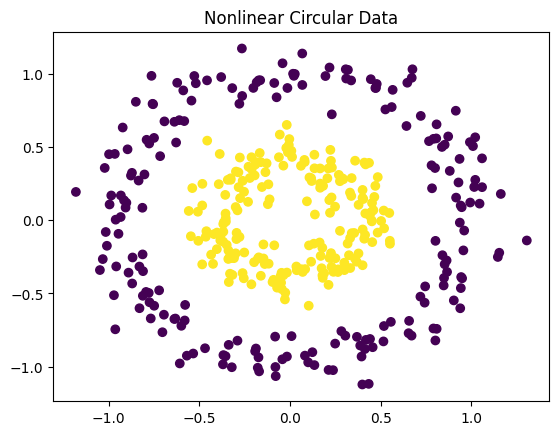

In [2]:
X, y = make_circles(n_samples=400, noise=0.1, factor=0.4, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Nonlinear Circular Data")
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [4]:
def plot_boundary(model, title):
    model.fit(X_train, y_train)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title(title)
    plt.show()

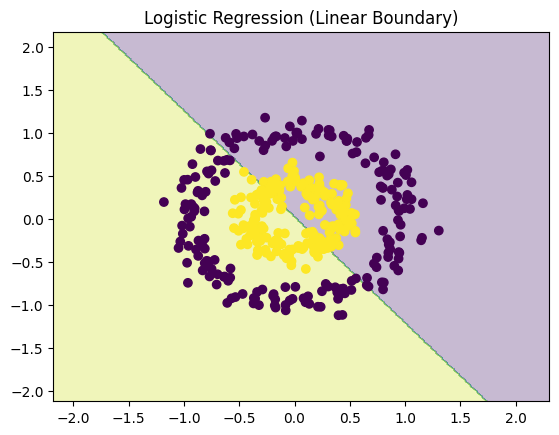

In [5]:
log_model = LogisticRegression()
plot_boundary(log_model, "Logistic Regression (Linear Boundary)")

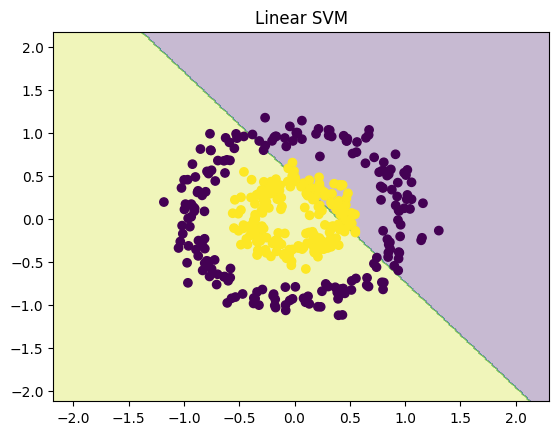

In [6]:
linear_svm = SVC(kernel='linear', C=1)
plot_boundary(linear_svm, "Linear SVM")

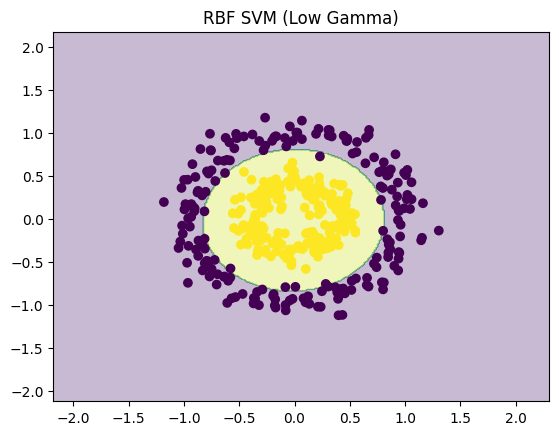

In [7]:
rbf_low_gamma = SVC(kernel='rbf', gamma=0.1, C=1)
plot_boundary(rbf_low_gamma, "RBF SVM (Low Gamma)")

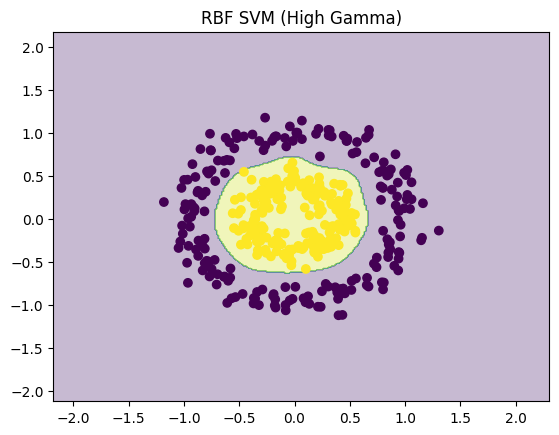

In [8]:
rbf_high_gamma = SVC(kernel='rbf', gamma=20, C=1)
plot_boundary(rbf_high_gamma, "RBF SVM (High Gamma)")

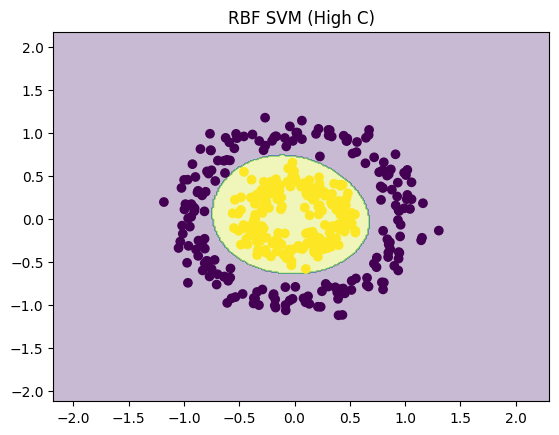

In [9]:
rbf_high_C = SVC(kernel='rbf', gamma=1, C=100)
plot_boundary(rbf_high_C, "RBF SVM (High C)")

Observations:

1. Logistic Regression and Linear SVM:
   - Linear boundaries.
   - Cannot separate nonlinear data.

2. RBF SVM:
   - Maps data to higher-dimensional space.
   - Produces curved boundary.

3. Gamma:
   - Low gamma → smooth boundary (higher bias).
   - High gamma → wiggly boundary (higher variance).

4. C:
   - High C → strict classification, smaller margin.
   - Low C → larger margin, more tolerance to errors.

SVM balances:
- Margin maximization
- Classification error
- Boundary flexibility